<a href="https://colab.research.google.com/github/mar2nyuedu/colab/blob/main/Mohammed_Rahman_HW3_Task3_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to Neural Nets

This Colab builds a deep neural network to perform more sophisticated regression than the earlier Colabs.

## Learning Objectives:

After doing this Colab, you'll know how to do the following:

  * Create a simple deep neural network.
  * Tune the hyperparameters for a simple deep neural network.

## The Dataset
  
Like several of the previous Colabs, this Colab uses the [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [173]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
# import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Imported modules.")

Imported modules.


## Load the dataset

Like most of the previous Colab exercises, this exercise uses the California Housing Dataset.  The following code cell loads the separate .csv files and creates the following two pandas DataFrames:

* `train_df`, which contains the training set
* `test_df`, which contains the test set
   

In [174]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the examples helps ensuring that batches are more representative of the entire dataset 
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [175]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5436,-118.2,34.1,17.0,821.0,163.0,229.0,164.0,7.4,263000.0
12994,-121.8,37.3,19.0,2228.0,559.0,2845.0,551.0,2.6,172800.0
11632,-121.3,38.1,27.0,836.0,132.0,303.0,133.0,3.9,127400.0
5919,-118.2,34.2,25.0,434.0,74.0,199.0,75.0,5.9,420500.0
12523,-121.6,36.7,19.0,5015.0,1013.0,3251.0,940.0,4.0,152900.0
...,...,...,...,...,...,...,...,...,...
7690,-118.4,34.2,42.0,715.0,145.0,730.0,158.0,3.8,169500.0
13407,-121.9,37.3,29.0,3377.0,853.0,1674.0,792.0,3.4,229300.0
6794,-118.3,34.1,38.0,2067.0,914.0,2717.0,853.0,1.8,250000.0
5727,-118.2,34.0,46.0,1051.0,302.0,1435.0,305.0,1.7,133600.0


In [176]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


## Normalize values

When building a model with multiple features, the values of each feature should cover roughly the same range.  The following code cell normalizes datasets by converting each raw value to its Z-score. 

In [177]:
#@title Convert raw values to their Z-scores 

# Calculate the Z-scores of each column in the training set:
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Calculate the Z-scores of each column in the test set.
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

print("Normalized the values.")

Normalized the values.


In [178]:
train_df_norm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5436,0.7,-0.7,-0.9,-0.8,-0.9,-1.0,-0.9,1.8,0.5
12994,-1.1,0.8,-0.8,-0.2,0.0,1.2,0.1,-0.7,-0.3
11632,-0.9,1.2,-0.1,-0.8,-1.0,-1.0,-1.0,-0.0,-0.7
5919,0.7,-0.7,-0.3,-1.0,-1.1,-1.1,-1.1,1.1,1.8
12523,-1.0,0.5,-0.8,1.1,1.1,1.6,1.1,0.1,-0.5
...,...,...,...,...,...,...,...,...,...
7690,0.6,-0.7,1.1,-0.9,-0.9,-0.6,-0.9,-0.0,-0.3
13407,-1.2,0.8,0.0,0.3,0.7,0.2,0.8,-0.2,0.2
6794,0.6,-0.7,0.7,-0.3,0.9,1.1,0.9,-1.1,0.4
5727,0.7,-0.7,1.4,-0.7,-0.6,0.0,-0.5,-1.2,-0.6


In [179]:
train_df_norm.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.4,-1.4,-2.2,-1.2,-1.3,-1.2,-1.3,-1.8,-1.7
25%,-1.1,-0.8,-0.8,-0.5,-0.6,-0.6,-0.6,-0.7,-0.8
50%,0.5,-0.6,0.0,-0.2,-0.3,-0.2,-0.2,-0.2,-0.2
75%,0.8,1.0,0.7,0.2,0.3,0.3,0.3,0.5,0.5
max,2.6,3.0,1.9,16.2,14.0,29.8,14.5,5.8,2.5


## Represent data

The following code cell creates a feature layer containing three features:

* `latitude` X `longitude` (a feature cross)
* `median_income`
* `population`

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented. The transformations (collected in `my_feature_layer`) don't actually get applied until you pass a DataFrame to it, which will happen when we train the model. 

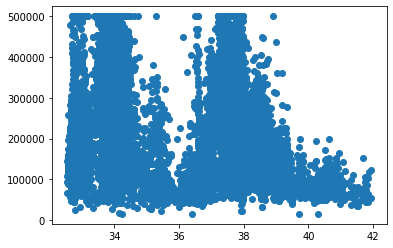

In [180]:
plt.scatter(train_df["latitude"], train_df["median_house_value"])

In [181]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# We scaled all the columns, including latitude and longitude, into their
# Z scores. So, instead of picking a resolution in degrees, we're going
# to use resolution_in_Zs.  A resolution_in_Zs of 1 corresponds to 
# a full standard deviation. 
resolution_in_Zs = 0.3  # 3/10 of a standard deviation.

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df_norm['latitude'])), 
                                     int(max(train_df_norm['latitude'])), 
                                     resolution_in_Zs))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df_norm['longitude'])), 
                                      int(max(train_df_norm['longitude'])), 
                                      resolution_in_Zs))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)  

# Represent median_income as a floating-point value.
median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)

# Represent population as a floating-point value.
population = tf.feature_column.numeric_column("population")
feature_columns.append(population)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

## Build a linear regression model as a baseline

Before creating a deep neural net, find a [baseline](https://developers.google.com/machine-learning/glossary/#baseline) loss by running a simple linear regression model that uses the feature layer you just created. 


In [182]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [183]:
#@title Define functions to create and train a linear regression model
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse   

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Run the following code cell to invoke the functions defined in the preceding two code cells. (Ignore the warning messages.)

**Note:** Because we've scaled all the input data, **including the label**, the resulting loss values will be *much less* than previous models. 

**Note:** Depending on the version of TensorFlow, running this cell might generate WARNING messages. Please ignore these warnings. 

Epoch 1/40


17/17 [==============================] - 1s 3ms/step - loss: 0.9368 - mean_squared_error: 0.9368
Epoch 2/40
17/17 [==============================] - 0s 3ms/step - loss: 0.8951 - mean_squared_error: 0.8951
Epoch 3/40
17/17 [==============================] - 0s 3ms/step - loss: 0.8609 - mean_squared_error: 0.8609
Epoch 4/40
17/17 [==============================] - 0s 3ms/step - loss: 0.8286 - mean_squared_error: 0.8286
Epoch 5/40
17/17 [==============================] - 0s 3ms/step - loss: 0.7980 - mean_squared_error: 0.7980
Epoch 6/40
17/17 [==============================] - 0s 3ms/step - loss: 0.7688 - mean_squared_error: 0.7688
Epoch 7/40
17/17 [==============================] - 0s 4ms/step - loss: 0.7409 - mean_squared_error: 0.7409
Epoch 8/40
17/17 [==============================] - 0s 3ms/step - loss: 0.7141 - mean_squared_error: 0.7141
Epoch 9/40
17/17 [==============================] - 0s 3ms/step - loss: 0.6884 - mean_squared_error: 0.6884
Epoch 10/40
17/17 [====================

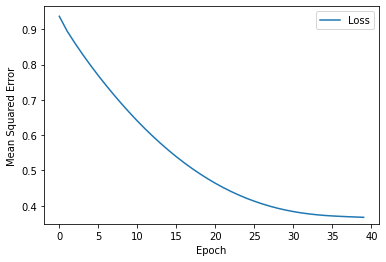


 Evaluate the linear regression model against the test set:
3/3 [==============================] - 0s 5ms/step - loss: 0.3990 - mean_squared_error: 0.3990


[0.39903414249420166, 0.39903414249420166]

In [184]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 40
batch_size = 1000
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

## Define a deep neural net model

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.

In [185]:
def create_model(my_learning_rate, my_feature_layer,l2):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.

  # Define the first hidden layer with 20 nodes.   

  model.add(tf.keras.layers.Dense(units=20, 
                                activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(l=l2),
                                name='Hidden1'))

  
  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(l=l2),
                                  name='Hidden2'))



  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

## Task 3: Regularize the deep neural network

Notice that the model's loss against the test set may be *much higher* than the loss against the training set.  In other words, the deep neural network may be [overfitting](https://developers.google.com/machine-learning/glossary/#overfitting) to the data in the training set.  To reduce overfitting, regularize the model. Several different ways to regularize a model, including:

  * [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization)
  * [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization)
  * [Dropout regularization](https://developers.google.com/machine-learning/glossary/#dropout_regularization)

Your task is to experiment with one or more regularization mechanisms to bring the test loss closer to the training loss (while still keeping test loss relatively low).  

**Note:** When you add a regularization function to a model, you might need to tweak other hyperparameters. 

### Implementing L1 or L2 regularization

To use L1 or L2 regularization on a hidden layer, specify the `kernel_regularizer` argument to [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). Assign one of the following methods to this argument:

* `tf.keras.regularizers.l1` for L1 regularization
* `tf.keras.regularizers.l2` for L2 regularization

Each of the preceding methods takes an `l` parameter, which adjusts the [regularization rate](https://developers.google.com/machine-learning/glossary/#regularization_rate). Assign a decimal value between 0 and 1.0 to `l`; the higher the decimal, the greater the regularization. For example, the following applies L2 regularization at a strength of 0.01. 

```
model.add(tf.keras.layers.Dense(units=20, 
                                activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(l=0.01),
                                name='Hidden1'))
```

### Implementing Dropout regularization

You implement dropout regularization as a separate layer in the topography. For example, the following code demonstrates how to add a dropout regularization layer between the first hidden layer and the second hidden layer:

```
model.add(tf.keras.layers.Dense( *define first hidden layer*)
 
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Dense( *define second hidden layer*)
```

The `rate` parameter to [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) specifies the fraction of nodes that the model should drop out during training. 


## Define a training function

The `train_model` function trains the model from the input features and labels. The [tf.keras.Model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) method performs the actual training. The `x` parameter of the `fit` method is very flexible, enabling you to pass feature data in a variety of ways. The following implementation passes a Python dictionary in which:

* The *keys* are the names of each feature (for example, `longitude`, `latitude`, and so on).
* The *value* of each key is a NumPy array containing the values of that feature. 

**Note:** Although you are passing *every* feature to `model.fit`, most of those values will be ignored. Only the features accessed by `my_feature_layer` will actually be used to train the model.

In [186]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None):
  """Train the model by feeding it data."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

## Call the functions to build and train a deep neural net

Okay, it is time to actually train the deep neural net.  If time permits, experiment with the three hyperparameters to see if you can reduce the loss
against the test set.


In [187]:
l2 = 0.00

data = pd.DataFrame()
pd.options.display.float_format = "{:.4f}".format
data["L2"] = pd.Series(dtype='object')
data["train_mse"] = pd.Series(dtype='object')
data["test_mse"] = pd.Series(dtype='object')
data["diff_in_%"] = pd.Series(dtype='object')

while(l2<=.05):

  # The following variables are the hyperparameters.
  learning_rate = 0.01
  epochs = 20
  batch_size = 1000

  # Specify the label
  label_name = "median_house_value"

  # Establish the model's topography.
  my_model = create_model(learning_rate, my_feature_layer,l2)

  # Train the model on the normalized training set. We're passing the entire
  # normalized training set, but the model will only use the features
  # defined by the feature_layer.
  epochs, train_mse = train_model(my_model, train_df_norm, epochs, 
                            label_name, batch_size)
  #plot_the_loss_curve(epochs, mse)
  
  # After building a model against the training set, test that model
  # against the test set.
  test_features = {name:np.array(value) for name, value in test_df_norm.items()}
  test_label = np.array(test_features.pop(label_name)) # isolate the label
  print("\n Evaluate the new model against the test set:")
  test_mse=my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)
  diff = abs((test_mse[0]-train_mse[19])/train_mse[19]*100)
  # Add rows to the DataFrame
  row = {'L2': l2, 'train_mse': round(train_mse[19],4), 'test_mse': round(test_mse[0],4), 'diff_in_%' :  diff}
  data = data.append(row, ignore_index=True)
  l2= l2 + 0.01

print(data)

Epoch 1/20


17/17 [==============================] - 1s 4ms/step - loss: 0.6007 - mean_squared_error: 0.6007
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3704 - mean_squared_error: 0.3704
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3434 - mean_squared_error: 0.3434
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3381 - mean_squared_error: 0.3381
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3353 - mean_squared_error: 0.3353
Epoch 6/20
17/17 [==============================] - 0s 8ms/step - loss: 0.3339 - mean_squared_error: 0.3339
Epoch 7/20
17/17 [==============================] - 0s 11ms/step - loss: 0.3334 - mean_squared_error: 0.3334
Epoch 8/20
17/17 [==============================] - 0s 12ms/step - loss: 0.3321 - mean_squared_error: 0.3321
Epoch 9/20
17/17 [==============================] - 0s 10ms/step - loss: 0.3317 - mean_squared_error: 0.3317
Epoch 10/20
17/17 [=================


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 8ms/step - loss: 0.3669 - mean_squared_error: 0.3669
Epoch 1/20


<ipython-input-187-0f4b77c217b6>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)


17/17 [==============================] - 1s 6ms/step - loss: 0.9598 - mean_squared_error: 0.7876
Epoch 2/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5646 - mean_squared_error: 0.4777
Epoch 3/20
17/17 [==============================] - 0s 6ms/step - loss: 0.4431 - mean_squared_error: 0.3691
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.4181 - mean_squared_error: 0.3549
Epoch 5/20
17/17 [==============================] - 0s 7ms/step - loss: 0.4060 - mean_squared_error: 0.3540
Epoch 6/20
17/17 [==============================] - 0s 8ms/step - loss: 0.4002 - mean_squared_error: 0.3507
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3957 - mean_squared_error: 0.3513
Epoch 8/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3941 - mean_squared_error: 0.3509
Epoch 9/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3886 - mean_squared_error: 0.3476
Epoch 10/20
17/17 [====================


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 5ms/step - loss: 0.4023 - mean_squared_error: 0.3711
Epoch 1/20


<ipython-input-187-0f4b77c217b6>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)


17/17 [==============================] - 1s 4ms/step - loss: 1.0286 - mean_squared_error: 0.6922
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5562 - mean_squared_error: 0.4192
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4729 - mean_squared_error: 0.3746
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4378 - mean_squared_error: 0.3633
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4243 - mean_squared_error: 0.3614
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4151 - mean_squared_error: 0.3583
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4112 - mean_squared_error: 0.3595
Epoch 8/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4087 - mean_squared_error: 0.3597
Epoch 9/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4044 - mean_squared_error: 0.3577
Epoch 10/20
17/17 [====================

3/3 [==============================] - 0s 5ms/step - loss: 0.4182 - mean_squared_error: 0.3818
Epoch 1/20


<ipython-input-187-0f4b77c217b6>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)


17/17 [==============================] - 1s 4ms/step - loss: 1.1968 - mean_squared_error: 0.6779
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5978 - mean_squared_error: 0.4411
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4829 - mean_squared_error: 0.3847
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4484 - mean_squared_error: 0.3747
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4371 - mean_squared_error: 0.3716
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.4308 - mean_squared_error: 0.3702
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4255 - mean_squared_error: 0.3671
Epoch 8/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4224 - mean_squared_error: 0.3657
Epoch 9/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4212 - mean_squared_error: 0.3661
Epoch 10/20
17/17 [====================


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 6ms/step - loss: 0.4337 - mean_squared_error: 0.3884
Epoch 1/20


<ipython-input-187-0f4b77c217b6>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)


17/17 [==============================] - 1s 4ms/step - loss: 1.3312 - mean_squared_error: 0.6514
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6880 - mean_squared_error: 0.5094
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5607 - mean_squared_error: 0.4683
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5063 - mean_squared_error: 0.4366
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.4808 - mean_squared_error: 0.4159
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4656 - mean_squared_error: 0.4006
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4550 - mean_squared_error: 0.3934
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.4463 - mean_squared_error: 0.3850
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.4388 - mean_squared_error: 0.3802
Epoch 10/20
17/17 [====================


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 6ms/step - loss: 0.4398 - mean_squared_error: 0.3967
Epoch 1/20


<ipython-input-187-0f4b77c217b6>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)


17/17 [==============================] - 1s 4ms/step - loss: 1.4054 - mean_squared_error: 0.5583
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6277 - mean_squared_error: 0.4058
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5189 - mean_squared_error: 0.3892
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4774 - mean_squared_error: 0.3835
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4636 - mean_squared_error: 0.3819
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4543 - mean_squared_error: 0.3757
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4475 - mean_squared_error: 0.3754
Epoch 8/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4431 - mean_squared_error: 0.3730
Epoch 9/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4416 - mean_squared_error: 0.3736
Epoch 10/20
17/17 [====================

3/3 [==============================] - 0s 5ms/step - loss: 0.4473 - mean_squared_error: 0.3918
      L2  train_mse  test_mse  diff_in_%
0 0.0000     0.3272    0.3669    12.1604
1 0.0100     0.3411    0.4023    17.9218
2 0.0200     0.3503    0.4182    19.4048
3 0.0300     0.3577    0.4337    21.2306
4 0.0400     0.3634    0.4398    21.0397
5 0.0500     0.3660    0.4473    22.2135


<ipython-input-187-0f4b77c217b6>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)


In [188]:
print(data)


      L2  train_mse  test_mse  diff_in_%
0 0.0000     0.3272    0.3669    12.1604
1 0.0100     0.3411    0.4023    17.9218
2 0.0200     0.3503    0.4182    19.4048
3 0.0300     0.3577    0.4337    21.2306
4 0.0400     0.3634    0.4398    21.0397
5 0.0500     0.3660    0.4473    22.2135


## Task 1: Compare the two models

How did the deep neural net perform against the baseline linear regression model?

## Task 2: Optimize the deep neural network's topography

Experiment with the number of layers of the deep neural network and the number of nodes in each layer.  Aim to achieve both of the following goals:

*  Lower the loss against the test set.
*  Minimize the overall number of nodes in the deep neural net. 

The two goals may be in conflict.

## Task 3: Regularize the deep neural network

Notice that the model's loss against the test set may be *much higher* than the loss against the training set.  In other words, the deep neural network may be [overfitting](https://developers.google.com/machine-learning/glossary/#overfitting) to the data in the training set.  To reduce overfitting, regularize the model. Several different ways to regularize a model, including:

  * [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization)
  * [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization)

# I have tried to use different values of L2 for both the hidden layers to reduce the gap between the training and test MSE. However, I didn't have any luck with it. Turns out that the best result is obtained when L2 is zero. However, I was able to reduce the gap by increasing the number of Epochs and Batch size keeping L2 to zero but that's not what I was supposed to do here. Here is the data:

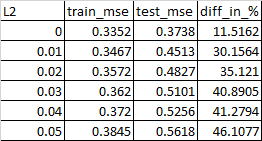

# So instead, I did a research on L1 and L2 and came up with the following:

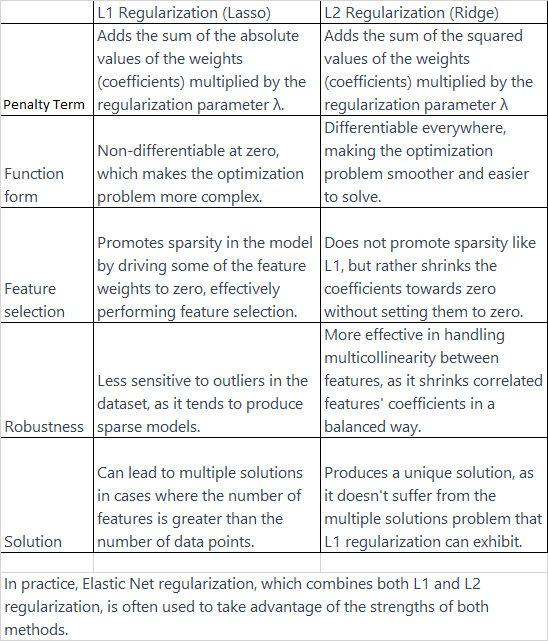
  * [Dropout regularization](https://developers.google.com/machine-learning/glossary/#dropout_regularization)

Your task is to experiment with one or more regularization mechanisms to bring the test loss closer to the training loss (while still keeping test loss relatively low).  

**Note:** When you add a regularization function to a model, you might need to tweak other hyperparameters. 

### Implementing L1 or L2 regularization

To use L1 or L2 regularization on a hidden layer, specify the `kernel_regularizer` argument to [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). Assign one of the following methods to this argument:

* `tf.keras.regularizers.l1` for L1 regularization
* `tf.keras.regularizers.l2` for L2 regularization

Each of the preceding methods takes an `l` parameter, which adjusts the [regularization rate](https://developers.google.com/machine-learning/glossary/#regularization_rate). Assign a decimal value between 0 and 1.0 to `l`; the higher the decimal, the greater the regularization. For example, the following applies L2 regularization at a strength of 0.01. 

```
model.add(tf.keras.layers.Dense(units=20, 
                                activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(l=0.01),
                                name='Hidden1'))
```

### Implementing Dropout regularization

You implement dropout regularization as a separate layer in the topography. For example, the following code demonstrates how to add a dropout regularization layer between the first hidden layer and the second hidden layer:

```
model.add(tf.keras.layers.Dense( *define first hidden layer*)
 
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Dense( *define second hidden layer*)
```

The `rate` parameter to [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) specifies the fraction of nodes that the model should drop out during training. 
